# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Bastian Bickel

Datum: 19.11.2023

Gruppe: 39

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann durch den Versuch die Wärmekapazität des Behälters mit kaltem Wasser näherungsweise ermittelt werden? Dabei wird davon ausgegangen, das der Behälter aus PET besteht und somit eine spezifische Wärmekapazität von 1,1 kJ/kgK aufweisen sollte.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/picture_231010_Beispielbild_Tasse_Auswertung.jpg" width="800">

![Wärmekapazität_Bild](figures/Wärmekapazität_Bild.jpg)

Für den Versuch wird ein Sensor in einen Behälter mit kaltem Wasser und ein zweiter Sensor in einen Behälter mit warmen Wasser gegeben. Der Behälter mit kaltem Wasser ist groß genug um das warme Wasser ebenfalls mit fassen zu können. 
Sobald die Messung gestartet wird, messen die Sensoren die Temperaturen der Flüssigkeiten. Dann wird langsam das warme Wasser in den Behälter mit kaltem Wasser geschüttet bis beide Flüssigkeiten und Sensoren sich im großen Behälter befinden. Anschließend wird die zusammengefügte Flüssigkeit mit dem Löffel verrührt um eine einheitliche Mischungstemperatur in der gesamten Flüssigkeit zu erhalten. Sobald die gemessenen Temperaturen beider Sensoren sich ausreischend angenähert haben, kann die Messung beendet werden.

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
import h5py
#Lesen der Hdf5 Datei
f = h5py.File('data/Wärmekapazität/Wärmekapazität.h5', 'r')

# DONE #

In [17]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

#Datasets der gemessenen Temperaturen auslesen
temp_warmwasser = f['RawData']['1ee7f0ee-5505-643b-995c-c8fe94d6d482']['temperature']
temp_kaltwasser = f['RawData']['1ee7f0ee-b9ce-6b33-a202-94164cd40a0c']['temperature']
#Datasets der gemessenen Zeiten auslesen
time_warmwasser = f['RawData']['1ee7f0ee-5505-643b-995c-c8fe94d6d482']['timestamp']
time_kaltwasser = f['RawData']['1ee7f0ee-b9ce-6b33-a202-94164cd40a0c']['timestamp']

# DONE #

#### (ii) Daten ploten

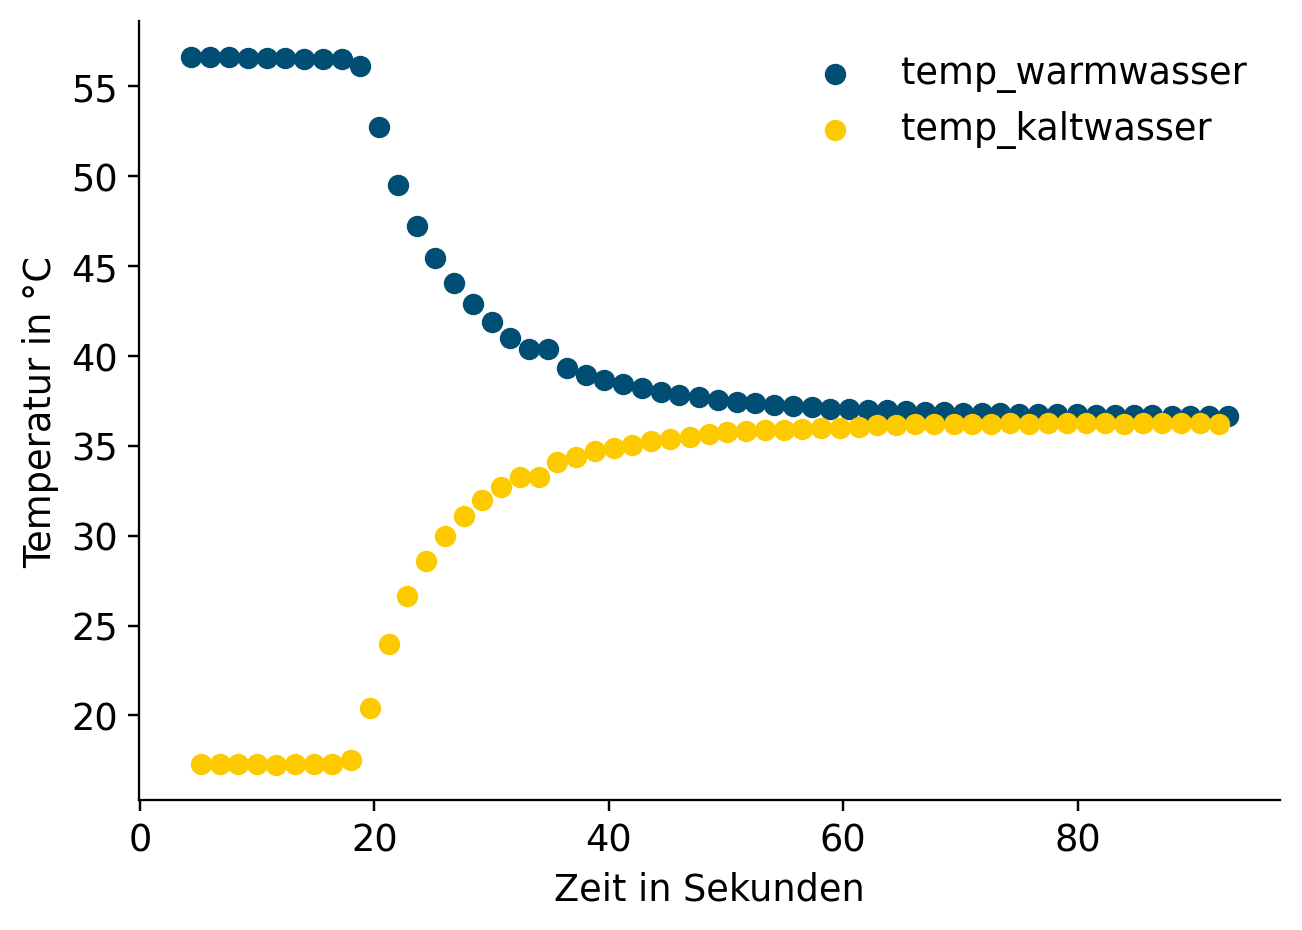

In [32]:
# TODO: Use the temperature and time data for plotting
#Temperatur- und Zeitdaten plotten
plt.scatter(time_warmwasser, temp_warmwasser)
plt.scatter(time_kaltwasser, temp_kaltwasser)
#Legende erstellen
plt.legend(['temp_warmwasser', 'temp_kaltwasser'])
#Achsen beschriften
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Temperatur in °C')

plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [23]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
import json
#öffnen der der probe
with open ("datasheets/probe_heat_capacity.json") as json_file:
    probe_heat_capacity = json.load(json_file)
m_cup = int(probe_heat_capacity['probe']['metadata']) / 1000 #durch 1000 da in json in gramm angegeben
#Beide Behälter sind mit der gleichen Menge Wasser gefüllt
m_add = m_cup

m_ges = m_cup + m_add

print("Die Masse des hinzugefügten warmen Wassers beträgt "+str(m_add)+" kg")
print("Die Masse des kalten Wassers im Behälter beträgt "+str(m_cup)+" kg")
print("Die Masse des gesamten gemischten Wassers beträgt "+str(m_ges)+" kg")

# DONE #

Die Masse des hinzugefügten warmen Wassers beträgt 0.5 kg
Die Masse des kalten Wassers im Behälter beträgt 0.5 kg
Die Masse des gesamten gemischten Wassers beträgt 1.0 kg


#### (iV) Anfangs- und Endwert der Temperatur

In [26]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#Anfangstemperatur des hinzugefügten Wassers
T_2 = temp_warmwasser[0]
print("Die Temperatur des hinzugefügten warmen Wassers beträgt "+str(T_2)+" °C")

#Anfangstemperatur des Wassers im Behälter
T_1 = temp_kaltwasser[0]
print("Die Temperatur des kalten Wassersim Behälters beträgt "+str(T_1)+" °C")

#Mischungstemperatur
T_M = (temp_warmwasser[-1] + temp_kaltwasser[-1]) / 2
print("Die mittlere Mischungstemperatur der beiden Flüssigkeiten beträgt "+str(T_M)+" °C")

# DONE #

Die Temperatur des hinzugefügten warmen Wassers beträgt 56.625 °C
Die Temperatur des kalten Wassersim Behälters beträgt 17.3125 °C
Die mittlere Mischungstemperatur der beiden Flüssigkeiten beträgt 36.40625 °C


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [14]:
# TODO: Calculate heat capacity of the calorimeter

C = ((m_add * water_heat_capa * (T_2 - T_M)) / (T_M - T_1)) - m_cup * water_heat_capa

C_spez = C / m_add

# DONE #

#### (Vi) Ergebnis

In [33]:
# TODO: Print result

print("Die Wärmekapazität beträgt "+str(round(C, 5))+" kJ/K")

print("Die spezifische Wärmekapazität beträgt "+str(round(C_spez, 5))+" kJ/(kg*K)")

# DONE #

Die Wärmekapazität beträgt 0.12314 kJ/K
Die spezifische Wärmekapazität beträgt 0.24628 kJ/(kg*K)


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die ermittelte spezifische Wärmekapazität des Behälters mit kaltem Wasser beträgt 0.24528 kJ/kgK und weicht somit etwas vom erwartetetn Wert eines PET Behälters mit einer Wärmekapazität von 1.1 kJ/kgK ab.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die erwartete Wärmekapazität konnte nicht ermittelt werden und weicht etwas vom ermittelten Wert des Versuchs ab. Diese ist möglicherweise jedoch noch immer im möglichen Bereich, da die Abweichung möglicherweise durch äußere Umstände wie der Umgebung oder dem sehr alten und abgenutzten Behälter verursacht wurde. 